<img src="./img/DC_Gray _Logo.png">

<center><h2> Module 4 Project</h2></center>
<center><h2> Advanced Regression Models</h2></center>

**Authors:** Aroa Gomez and Mohammed Hannan


#### Business Problem
Our client would like to increase the popularity of articles published on their site. They would like to know what features an article should have to increase the number of shares an article receives.

#### Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from cleaning import *
from sklearn.feature_selection import VarianceThreshold
from sklearn import metrics
from refactoring import *
from cleaning import *

#### 1. Linear Regression

    Data: Online News Popularity,
    source: UCI (University of California, Irvine)

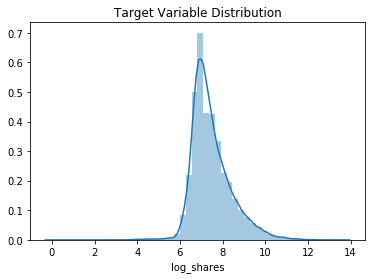

In [2]:
data = pd.read_csv('OnlineNewsPopularity.csv')
data = strip_columns(data)
data = log_target(data, 'shares')

variables_list = ['shares', 'log_shares','timedelta','n_tokens_title', 'n_tokens_content','kw_avg_avg','n_unique_tokens','num_hrefs','num_imgs', 'num_videos', 'num_keywords', 
           'self_reference_avg_sharess','data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 
           'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 
           'data_channel_is_socmed', 'data_channel_is_tech','data_channel_is_world', 'is_weekend',
           'rate_positive_words','rate_negative_words', 'avg_positive_polarity', 'avg_negative_polarity',
           'title_subjectivity','title_sentiment_polarity','LDA_01', 'LDA_02', 'LDA_03', 'LDA_04']

data = variables(data, variables_list)
data = delete_value(data,'n_unique_tokens')

In [3]:
y = data['log_shares']
X = data.drop(['shares', 'log_shares'], axis=1)

In [4]:
# To avoid multicollinearity, we are going to drop columns from X
# which have a correlation to other features in X
data_subset = drop_high_corrs(X)

In [5]:
# Check the number of features that are correlated to each other
np.sum(np.abs(data_subset.corr()) > 0.4)

timedelta                        1
n_tokens_title                   1
kw_avg_avg                       2
num_hrefs                        1
num_imgs                         1
num_videos                       1
num_keywords                     1
self_reference_avg_sharess       1
data_channel_is_lifestyle        1
data_channel_is_entertainment    2
data_channel_is_bus              1
global_rate_positive_words       1
global_rate_negative_words       2
data_channel_is_socmed           1
data_channel_is_tech             2
data_channel_is_world            2
is_weekend                       1
rate_negative_words              2
avg_positive_polarity            1
avg_negative_polarity            1
title_subjectivity               1
title_sentiment_polarity         1
LDA_01                           2
LDA_02                           2
LDA_03                           2
LDA_04                           2
dtype: int64

In [6]:
# Using statsmodels to observe p values and remove insignificant features
model = ols_model(data_subset, y, 'log_shares')
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_shares   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     180.7
Date:                Tue, 26 Nov 2019   Prob (F-statistic):               0.00
Time:                        11:45:49   Log-Likelihood:                -51172.
No. Observations:               39643   AIC:                         1.024e+05
Df Residuals:                   39616   BIC:                         1.026e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         7.2893      0.053    137.810      0.000       7.186       7.393
timedelta                       8.69e-05   2.25e-05      3.856      0.000    4.27e-05       0.000
n_tokens_title                    0.0053      0.002      2.429      0.015       0.001       0.010
kw_avg_avg                        0.0001   4.06e-06     26.479      0.000    9.96e-05       0.000
num_hrefs                         0.0043      0.000      9.933      0.000       0.003       0.005
num_imgs                          0.0037      0.001      6.134      0.000       0.002       0.005
num_videos                        0.0019      0.001      1.592      0.111      -0.000       0.004
num_keywords                      0.0145      0.002      5.915      0.000       0.010       0.019
self_reference_avg_sharess     1.781e-06   1.86e-07      9.582      0.000    1.42e-06    2.15e-06
data_channel_is_lifestyle        -0.1166      0.030     -3.949      0.000      -0.174      -0.059
data_channel_is_entertainment    -0.2831      0.018    -15.688      0.000      -0.318      -0.248
data_channel_is_bus              -0.2874      0.029    -10.035      0.000      -0.344      -0.231
global_rate_positive_words       -1.7172      0.399     -4.301      0.000      -2.500      -0.935
global_rate_negative_words        3.4106      0.886      3.848      0.000       1.673       5.148
data_channel_is_socmed            0.1025      0.028      3.705      0.000       0.048       0.157
data_channel_is_tech              0.0097      0.028      0.348      0.728      -0.045       0.064
data_channel_is_world            -0.1463      0.028     -5.246      0.000      -0.201      -0.092
is_weekend                        0.2651      0.013     20.065      0.000       0.239       0.291
rate_negative_words              -0.3363      0.068     -4.952      0.000      -0.469      -0.203
avg_positive_polarity            -0.0616      0.049     -1.249      0.212      -0.158       0.035
avg_negative_polarity            -0.2122      0.040     -5.323      0.000      -0.290      -0.134
title_subjectivity                0.0502      0.014      3.491      0.000       0.022       0.078
title_sentiment_polarity          0.0762      0.018      4.314      0.000       0.042       0.111
LDA_01                           -0.3356      0.040     -8.344      0.000      -0.414      -0.257
LDA_02                           -0.5420      0.038    -14.219      0.000      -0.617      -0.467
LDA_03                           -0.2492      0.038     -6.582      0.000      -0.323      -0.175
LDA_04                           -0.2292      0.035     -6.587      0.000      -0.297      -0.161
==============================================================================
Omnibus:                     7157.431   Durbin-Watson:          

In [7]:
high_p_vals = ['num_videos', 'data_channel_is_tech', 'avg_positive_polarity']
data_subset.drop(high_p_vals, axis = 1, inplace = True)

In [8]:
model = ols_model(data_subset, y, 'log_shares')
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_shares   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     204.1
Date:                Tue, 26 Nov 2019   Prob (F-statistic):               0.00
Time:                        11:45:52   Log-Likelihood:                -51174.
No. Observations:               39643   AIC:                         1.024e+05
Df Residuals:                   39619   BIC:                         1.026e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         7.2861      0.049    149.533      0.000       7.191       7.382
timedelta                      8.534e-05   2.25e-05      3.794      0.000    4.13e-05       0.000
n_tokens_title                    0.0055      0.002      2.508      0.012       0.001       0.010
kw_avg_avg                        0.0001   4.03e-06     26.628      0.000    9.94e-05       0.000
num_hrefs                         0.0044      0.000     10.183      0.000       0.004       0.005
num_imgs                          0.0035      0.001      5.904      0.000       0.002       0.005
num_keywords                      0.0143      0.002      5.868      0.000       0.010       0.019
self_reference_avg_sharess     1.784e-06   1.86e-07      9.602      0.000    1.42e-06    2.15e-06
data_channel_is_lifestyle        -0.1254      0.021     -5.876      0.000      -0.167      -0.084
data_channel_is_entertainment    -0.2834      0.017    -17.061      0.000      -0.316      -0.251
data_channel_is_bus              -0.2935      0.023    -12.824      0.000      -0.338      -0.249
global_rate_positive_words       -1.8993      0.372     -5.112      0.000      -2.628      -1.171
global_rate_negative_words        3.7760      0.863      4.377      0.000       2.085       5.467
data_channel_is_socmed            0.0976      0.023      4.255      0.000       0.053       0.143
data_channel_is_world            -0.1517      0.022     -7.002      0.000      -0.194      -0.109
is_weekend                        0.2646      0.013     20.034      0.000       0.239       0.290
rate_negative_words              -0.3655      0.065     -5.604      0.000      -0.493      -0.238
avg_negative_polarity            -0.2081      0.040     -5.260      0.000      -0.286      -0.131
title_subjectivity                0.0504      0.014      3.499      0.000       0.022       0.079
title_sentiment_polarity          0.0756      0.018      4.298      0.000       0.041       0.110
LDA_01                           -0.3420      0.038     -8.987      0.000      -0.417      -0.267
LDA_02                           -0.5413      0.038    -14.204      0.000      -0.616      -0.467
LDA_03                           -0.2504      0.034     -7.408      0.000      -0.317      -0.184
LDA_04                           -0.2256      0.033     -6.861      0.000      -0.290      -0.161
==============================================================================
Omnibus:                     7154.873   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19377.817
Skew:                           0.977   Prob(JB):                         0.00
Kurtosis:                       5.813   Cond. No.                     5.09e+06
==========================================

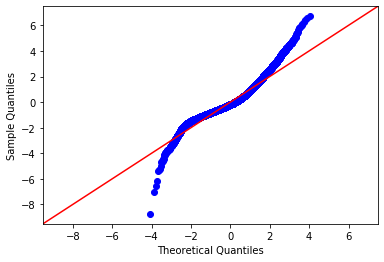

In [9]:
qq_plot(model, data_subset, y)

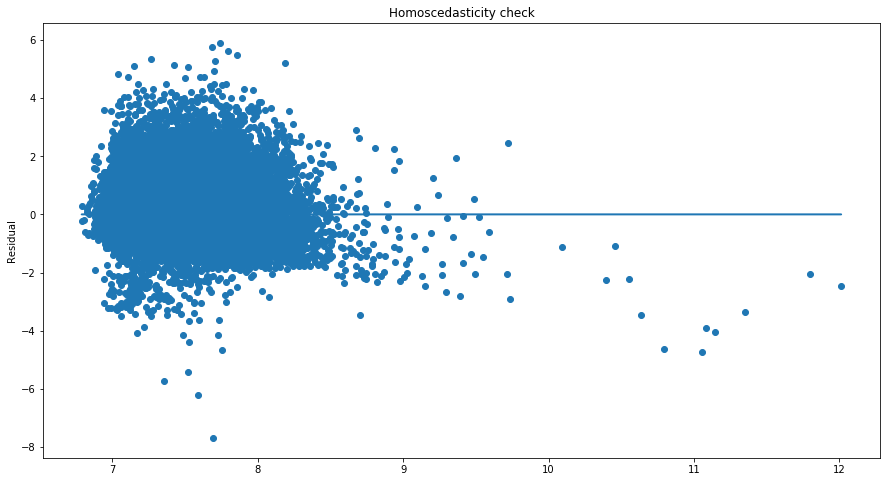

In [10]:
var_check(model, data_subset, y)

In [11]:
# Observe quantiles of target data and look for cutoff points
for i in range(80, 99):
    q = i / 100
    print('{} percentile: {}'.format(q, data['shares'].quantile(q=q)))

for i in range(1,20):
    q = i/100
    print('{} percentile: {}'.format(q, data['shares'].quantile(q=q)))

0.8 percentile: 3400.0
0.81 percentile: 3600.0
0.82 percentile: 3700.0
0.83 percentile: 3900.0
0.84 percentile: 4100.0
0.85 percentile: 4400.0
0.86 percentile: 4700.0
0.87 percentile: 5000.0
0.88 percentile: 5300.0
0.89 percentile: 5700.0
0.9 percentile: 6200.0
0.91 percentile: 6700.0
0.92 percentile: 7500.0
0.93 percentile: 8300.0
0.94 percentile: 9400.0
0.95 percentile: 10800.0
0.96 percentile: 12700.0
0.97 percentile: 15700.0
0.98 percentile: 20500.0
0.01 percentile: 381.0
0.02 percentile: 463.0
0.03 percentile: 513.26
0.04 percentile: 551.0
0.05 percentile: 584.0
0.06 percentile: 613.0
0.07 percentile: 641.0
0.08 percentile: 666.0
0.09 percentile: 689.0
0.1 percentile: 708.0
0.11 percentile: 725.0
0.12 percentile: 743.0
0.13 percentile: 759.0
0.14 percentile: 777.0
0.15 percentile: 792.0
0.16 percentile: 809.0
0.17 percentile: 824.0
0.18 percentile: 840.0
0.19 percentile: 855.0


In [12]:
lower_cutoff = 600
upper_cutoff = 5500
new_data = pd.concat([data_subset, data['shares'],data['log_shares']], axis=1)
new_data = new_data[(new_data['shares'] > lower_cutoff) & (new_data['shares'] < upper_cutoff)]
data_subset = new_data.drop(['shares', 'log_shares'], axis = 1)
y = new_data['log_shares']

In [13]:
model = ols_model(data_subset, y, 'log_shares')
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_shares   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     163.5
Date:                Tue, 26 Nov 2019   Prob (F-statistic):               0.00
Time:                        11:46:10   Log-Likelihood:                -24779.
No. Observations:               32798   AIC:                         4.961e+04
Df Residuals:                   32774   BIC:                         4.981e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         7.3469      0.032    232.140      0.000       7.285       7.409
timedelta                      8.658e-05   1.45e-05      5.986      0.000    5.82e-05       0.000
n_tokens_title                   -0.0022      0.001     -1.557      0.119      -0.005       0.001
kw_avg_avg                     5.047e-05   2.83e-06     17.845      0.000    4.49e-05     5.6e-05
num_hrefs                         0.0019      0.000      6.590      0.000       0.001       0.002
num_imgs                          0.0013      0.000      3.269      0.001       0.001       0.002
num_keywords                      0.0098      0.002      6.227      0.000       0.007       0.013
self_reference_avg_sharess     5.835e-07    1.2e-07      4.871      0.000    3.49e-07    8.18e-07
data_channel_is_lifestyle        -0.0917      0.014     -6.601      0.000      -0.119      -0.064
data_channel_is_entertainment    -0.1439      0.011    -13.165      0.000      -0.165      -0.122
data_channel_is_bus              -0.1760      0.015    -11.980      0.000      -0.205      -0.147
global_rate_positive_words       -0.7088      0.242     -2.923      0.003      -1.184      -0.234
global_rate_negative_words        2.3727      0.566      4.193      0.000       1.264       3.482
data_channel_is_socmed            0.1353      0.015      9.205      0.000       0.106       0.164
data_channel_is_world            -0.1182      0.014     -8.473      0.000      -0.146      -0.091
is_weekend                        0.2203      0.008     26.081      0.000       0.204       0.237
rate_negative_words              -0.2340      0.043     -5.484      0.000      -0.318      -0.150
avg_negative_polarity            -0.0488      0.026     -1.903      0.057      -0.099       0.001
title_subjectivity                0.0181      0.009      1.936      0.053      -0.000       0.036
title_sentiment_polarity          0.0308      0.012      2.672      0.008       0.008       0.053
LDA_01                           -0.3362      0.025    -13.675      0.000      -0.384      -0.288
LDA_02                           -0.3311      0.024    -13.584      0.000      -0.379      -0.283
LDA_03                           -0.3123      0.022    -14.288      0.000      -0.355      -0.270
LDA_04                           -0.1463      0.021     -6.926      0.000      -0.188      -0.105
==============================================================================
Omnibus:                     1599.628   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1659.760
Skew:                           0.518   Prob(JB):                         0.00
Kurtosis:                       2.626   Cond. No.                     5.14e+06
==========================================

In [14]:
high_p_vals = ['n_tokens_title', 'num_imgs', 'avg_negative_polarity']
data_subset.drop(high_p_vals, axis= 1, inplace= True)

In [15]:
model = ols_model(data_subset, y, 'log_shares')
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_shares   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     187.1
Date:                Tue, 26 Nov 2019   Prob (F-statistic):               0.00
Time:                        11:46:22   Log-Likelihood:                -24787.
No. Observations:               32798   AIC:                         4.962e+04
Df Residuals:                   32777   BIC:                         4.979e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         7.3254      0.028    263.337      0.000       7.271       7.380
timedelta                       9.05e-05   1.41e-05      6.403      0.000    6.28e-05       0.000
kw_avg_avg                     5.092e-05   2.83e-06     18.021      0.000    4.54e-05    5.65e-05
num_hrefs                         0.0023      0.000      8.362      0.000       0.002       0.003
num_keywords                      0.0098      0.002      6.261      0.000       0.007       0.013
self_reference_avg_sharess     5.879e-07    1.2e-07      4.910      0.000    3.53e-07    8.23e-07
data_channel_is_lifestyle        -0.0915      0.014     -6.590      0.000      -0.119      -0.064
data_channel_is_entertainment    -0.1444      0.011    -13.259      0.000      -0.166      -0.123
data_channel_is_bus              -0.1785      0.015    -12.165      0.000      -0.207      -0.150
global_rate_positive_words       -0.6293      0.235     -2.680      0.007      -1.089      -0.169
global_rate_negative_words        2.2894      0.564      4.056      0.000       1.183       3.396
data_channel_is_socmed            0.1352      0.015      9.200      0.000       0.106       0.164
data_channel_is_world            -0.1211      0.014     -8.698      0.000      -0.148      -0.094
is_weekend                        0.2211      0.008     26.181      0.000       0.205       0.238
rate_negative_words              -0.2119      0.041     -5.145      0.000      -0.293      -0.131
title_subjectivity                0.0180      0.009      1.930      0.054      -0.000       0.036
title_sentiment_polarity          0.0305      0.012      2.655      0.008       0.008       0.053
LDA_01                           -0.3311      0.025    -13.494      0.000      -0.379      -0.283
LDA_02                           -0.3298      0.024    -13.547      0.000      -0.377      -0.282
LDA_03                           -0.3060      0.022    -14.063      0.000      -0.349      -0.263
LDA_04                           -0.1454      0.021     -6.895      0.000      -0.187      -0.104
==============================================================================
Omnibus:                     1603.125   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1662.985
Skew:                           0.519   Prob(JB):                         0.00
Kurtosis:                       2.625   Cond. No.                     5.12e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

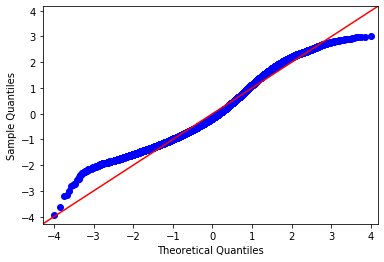

In [16]:
qq_plot(model, data_subset, y)

Training R^2 : 0.1024
Training Root Mean Square Error 0.5152

----------------

Testing R^2 : 0.1021
Testing Root Mean Square Error 0.5154


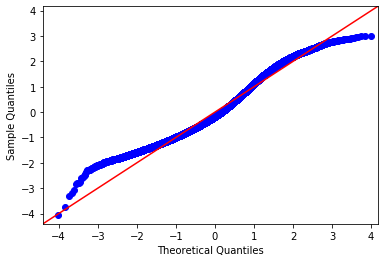

In [17]:
# Fit to a linear regression model
X_train , X_test, y_train, y_test = train_test_split(data_subset, y, test_size=0.25, random_state=42)
linreg = LinearRegression()
model = linreg.fit(X_train, y_train)
run_model(model, X_train, X_test, y_train, y_test)

Training R^2 : 0.1388
Training Root Mean Square Error 0.5047

----------------

Testing R^2 : 0.1239
Testing Root Mean Square Error 0.5091


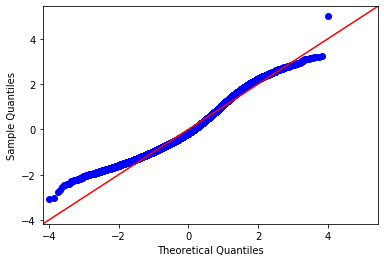

In [18]:
# Fit to a polynomial model of degree 2
# Too many features to model to a higher degree
compare_poly(X_train, X_test, y_train, y_test)

A polynomial model of degree 2 has a greater R^2 score than a simple linear model. We are going to use KFolds to validate our results

In [21]:
# Cross validation
poly = PolynomialFeatures(2)
data_poly = poly.fit_transform(data_subset)
crossvalidation = KFold(n_splits=5, shuffle=True, random_state=42)
avg_score = np.mean(cross_val_score(model, data_poly, y, scoring='r2', cv=crossvalidation))
avg_score

0.12337790900447616

#### Findings & Application

#### Popularity by Topic

Our data sample shows that lifestyle and social media articles are less popular in terms of number of times it gets shared. World news and technology news are the most populare among Mashable.com readers.

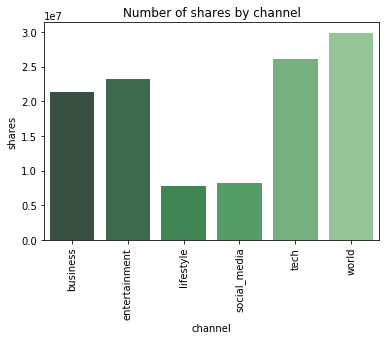

In [3]:
channel_list = ['data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 
               'data_channel_is_socmed', 'data_channel_is_tech','data_channel_is_world']

channel_graph(data, channel_list)

#### Popularity Along the Week

News articles are more popular during the week than on the weekends. We observe a decrease starting on Friday.

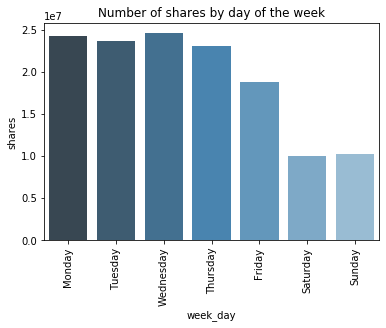

In [3]:
weekdays = ['weekday_is_monday', 'weekday_is_tuesday','weekday_is_wednesday', 'weekday_is_thursday', 
            'weekday_is_friday','weekday_is_saturday', 'weekday_is_sunday']

weekday_graph(data, weekdays)

Our Regression Models are limited on their prediction power. The most we can explain with the dataset in hand is 0.14 of the variability of number of shares. 

#### Next steps


We only have observations for a particular news provider. Exanding the data set to the top news provider could potentially add insights on the readers preferences

A larger dataset over a larger period of time would add more observations and probably better understanding

Adding more features that could determine the quality of the article could improve our model

Try different analysis approach; determine what level of shares is popular and what isn't and run a logistic regression model
